<a href="https://colab.research.google.com/github/tylee33/RL_Lecture/blob/master/%5BRL%EA%B0%95%EC%9D%98%5Depsilon_greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 탐색을 학습에 활용하는 방법: 엡실론-그리디 방법

![그림](https://ichef.bbci.co.uk/news/660/media/images/74580000/jpg/_74580127_162317629(1).jpg)

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
sns.set(style="whitegrid")
%matplotlib inline

In [0]:
class Enemy:
    def __init__(self, kawi, bawi, bo):
        assert sum([kawi, bawi, bo]) == 1.0
        self.hands = {0:'kawi', 1:'bawi', 2:'bo'}
        self.prob = [kawi, bawi, bo]
    
    def draw(self):
        action =  np.random.choice(3, p=self.prob)
        return self.hands[action]

In [0]:
enemy = Enemy(0.5, 0.25, 0.25)

In [4]:
enemy.draw()

'kawi'

In [0]:
samples = [enemy.draw() for _ in range(1000)]

In [0]:
cnt = Counter(samples)

([<matplotlib.axis.XTick at 0x7fb119996668>,
 <a list of 3 Text xticklabel objects>)

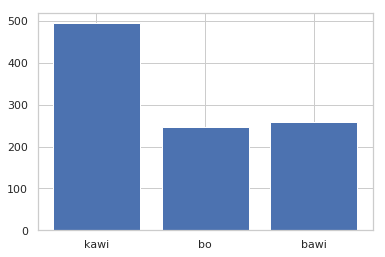

In [7]:
plt.bar(range(len(cnt)), cnt.values())
plt.xticks(range(len(cnt)), cnt.keys())

In [0]:
class Agent:
    def __init__(self, epsilon):
        self.hands = {0:'kawi', 1:'bawi', 2:'bo'}
        self.eps = epsilon
        self.count = {'kawi':[0, 0, 0], 'bawi':[0, 0, 0], 'bo': [0, 0, 0]}  # hand: [N_draw, N_win, N_lose]
        
    def draw(self):
        decision = 'exploit' if np.random.rand() > self.eps else 'explore'
        if decision == 'exploit':
            return self.greedy_act()
        elif decision == 'explore':
            return self.random_act()
        
    def greedy_act(self):
        temp_summary = {}
        for hand, vals in self.count.items():
            if sum(vals) == 0:
                temp_summary[hand] = 0
            else:
                win_rate = vals[1]/sum(vals)
                temp_summary[hand] = win_rate
        return max(temp_summary, key=temp_summary.get)
    
    def random_act(self):
        return self.hands[np.random.choice(3)]

In [0]:
class Game:
    def __init__(self, enemy, agent):
        self.enemy = enemy
        self.agent = agent
        
    def one_play(self):
        enemy_hand = self.enemy.draw()
        myhand = self.agent.draw()
        out = None
        if myhand == enemy_hand:
            out = 0
        elif myhand=='kawi' and enemy_hand=='bo':
            out = 1
        elif myhand=='bawi' and enemy_hand=='kawi':
            out = 1
        elif myhand=='bo' and enemy_hand=='bawi':
            out = 1
        else:
            out = -1
        return out, myhand

In [0]:
enemy = Enemy(0.9, 0.05, 0.05)
agent = Agent(0.1)
game = Game(enemy, agent)

In [0]:
run_avg = []
results = []
temp = []
for n in range(100):
    temp = []
    for k in range(20):
        out, agt_hand = game.one_play()
        if k == 1:
            agent.count[agt_hand][out] += 1
        temp.append(out)
    results.append(np.mean(temp))
    run_avg.append(np.mean(results))

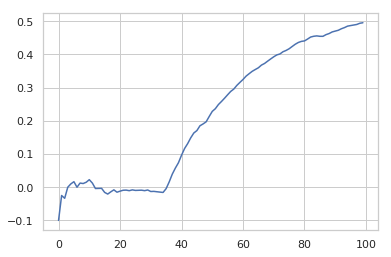

In [12]:
plt.plot(run_avg)

([<matplotlib.axis.XTick at 0x7fb117088048>,
 <a list of 3 Text xticklabel objects>)

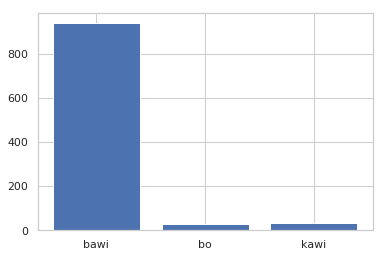

In [13]:
samples = [agent.draw() for _ in range(1000)]
cnt = Counter(samples)
plt.bar(range(len(cnt)), cnt.values())
plt.xticks(range(len(cnt)), cnt.keys())

In [0]:
def experiment(params, agent_eps, n_trails=100):
    enemy = Enemy(params[0], params[1], params[2])
    agent = Agent(agent_eps)
    game = Game(enemy, agent)
    run_avg = []
    results = []
    temp = []
    for n in range(n_trails):
        temp = []
        for k in range(20):
            out, agt_hand = game.one_play()
            if k == 1:
                agent.count[agt_hand][out] += 1
            temp.append(out)
        results.append(np.mean(temp))
        run_avg.append(np.mean(results))
    return run_avg

In [0]:
params = [0.9, 0.05, 0.05]
eps_01 = experiment(params, agent_eps=0.1)
eps_03 = experiment(params, agent_eps=0.3)
eps_005 = experiment(params, agent_eps=0.05)

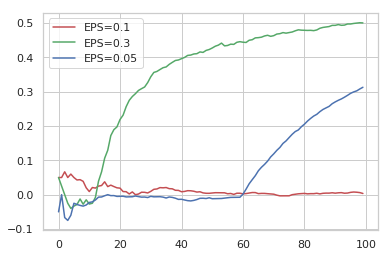

In [16]:
plt.plot(eps_01, color='r', label='EPS=0.1')
plt.plot(eps_03, color='g', label='EPS=0.3')
plt.plot(eps_005, color='b', label='EPS=0.05')
plt.legend(loc='best')

## 잘 터지는 슬롯 머신 고르기 문제

![그림](https://camo.githubusercontent.com/bd7121ebf35a6c248c7ca4fe6fde5dd028b4af77/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f382f38322f4c61735f56656761735f736c6f745f6d616368696e65732e6a7067)

In [0]:
mus = [0.2, 0.8, 1.5, 0.5, 1.3, 0.5, -0.2, -1.0, 0.9, 0.4]
mus = {'q'+str(i+1):mus[i] for i in range(len(mus))}
sigmas = {'q'+str(i+1):1 for i in range(len(mus))}
data = {'q'+str(i+1):[] for i in range(len(mus))}
for i in range(len(mus)):
    for _ in range(1000):
        key = 'q'+str(i+1)
        data[key].append(np.random.normal(mus[key], sigmas[key]))

In [18]:
data_pd = pd.DataFrame(data)
data_pd.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,-0.338463,0.679477,2.944124,-1.082395,1.568243,-0.154564,-0.863401,0.147413,0.427475,0.344818
1,-0.066084,1.109136,0.752209,1.197876,2.322243,-0.098339,-1.251213,0.170602,0.010887,0.031927
2,-1.002366,1.664552,1.941157,0.967358,0.716867,0.171057,-0.674408,-1.183194,-0.597215,-1.978006
3,0.494145,0.263927,1.006952,1.425945,1.833777,1.286510,-1.542174,-0.264394,0.193038,-1.084331
4,-0.215327,-0.024365,0.573218,2.045445,3.310974,-0.082685,-1.956791,-2.748356,1.678195,1.413671


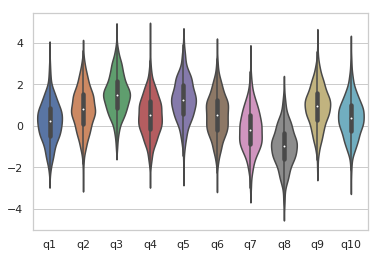

In [19]:
sns.violinplot(data=data_pd)

### 1. 보상값의 분산이 큰 경우, 탐색적 활동이 탐욕적 활동보다 더 필요하다.
### 2. 설사 보상값의 출현패턴이 결정적이라고 하더라도, 환경이 비고정적이라면 탐색적 활동은 여전히 가치있다.

In [0]:
class DobakAgent:
    def __init__(self, epsilon):
        ks = ['q'+str(i+1) for i in range(10)]
        self.N = {k:0 for k in ks}
        self.Q = {k:0 for k in ks}
        self.eps = epsilon
        
    def decide(self):
        decision = 'exploit' if np.random.rand() > self.eps else 'explore'
        if decision == 'exploit':
            return self.greedy_act()
        elif decision == 'explore':
            return self.random_act()
        
    def greedy_act(self):
        return max(self.Q, key=self.Q.get)
    
    def random_act(self):
        n = np.random.choice(10)
        return list(self.Q.keys())[n]
    
    def reset(self):
        self.__init__(self.eps)

In [0]:
def experiment(agt_00, agt_01, agt_001, sig=1, steps=500, n_runs=1000):
    res_agt_00 = {}
    res_agt_01 = {}
    res_agt_001 = {}
    for n in range(n_runs):
        # 한 번의 런마다 하나의 문제를 생성한다.
        mus = np.random.uniform(-3, 3, 10)
        mus = {'q'+str(i+1):mus[i] for i in range(len(mus))}
        sigmas = {'q'+str(i+1):sig for i in range(len(mus))}
        res_agt_00[n] = []
        res_agt_01[n] = []
        res_agt_001[n] = []
        # 에이전트들을 리셋 시킨다.
        agt_00.reset()
        agt_01.reset()
        agt_001.reset()
        for step in range(steps):
            # 각 에이전트는 슬롯머신 손잡이를 선택한다.
            action_00 = agt_00.decide()
            action_01 = agt_01.decide()
            action_001 = agt_001.decide()
            # 각 에이전트의 선택에 따른 결과를 받는다.
            reward_00 = np.random.normal(mus[action_00], sigmas[action_00])
            reward_01 = np.random.normal(mus[action_01], sigmas[action_01])
            reward_001 = np.random.normal(mus[action_001], sigmas[action_001])
            res_agt_00[n].append(reward_00)
            res_agt_01[n].append(reward_01)
            res_agt_001[n].append(reward_001)
            # 각 에이전트의 카운터를 올리고, 평균 보상값을 업데이트한다.
            agt_00.N[action_00] += 1
            agt_01.N[action_01] += 1
            agt_001.N[action_001] += 1
            agt_00.Q[action_00] += (1/agt_00.N[action_00]) * (reward_00 - agt_00.Q[action_00])
            agt_01.Q[action_01] += (1/agt_01.N[action_01]) * (reward_01 - agt_01.Q[action_01])
            agt_001.Q[action_001] += (1/agt_001.N[action_001]) * (reward_001 - agt_001.Q[action_001])
    # 각 타입 스탭마다 2000번의 시행결과를 평균낸다.
    res_00, res_01, res_001 = [], [], []
    for step in range(steps):
        temp_00, temp_01, temp_001 = [], [], []
        for n in range(n_runs):
            temp_00.append(res_agt_00[n][step])
            temp_01.append(res_agt_01[n][step])
            temp_001.append(res_agt_001[n][step])
        res_00.append(np.mean(temp_00))
        res_01.append(np.mean(temp_01))
        res_001.append(np.mean(temp_001))
    return res_00, res_01, res_001

In [0]:
agt_00 = DobakAgent(0.0)
agt_01 = DobakAgent(0.1)
agt_001 = DobakAgent(0.01)

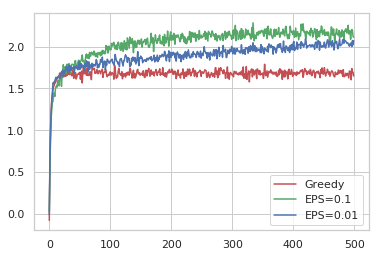

In [23]:
res_agt_00, res_agt_01, res_agt_001 = experiment(agt_00, agt_01, agt_001)

plt.plot(res_agt_00, color='r', label='Greedy')
plt.plot(res_agt_01, color='g', label='EPS=0.1')
plt.plot(res_agt_001, color='b', label='EPS=0.01')
plt.legend(loc='best')

## 분산이 0인 환경: 결정적 환경(deterministic task)

In [0]:
mus = [0.2, 0.8, 1.5, 0.5, 1.3, 0.5, -0.2, -1.0, 0.9, 0.4]
mus = {'q'+str(i+1):mus[i] for i in range(len(mus))}
sigmas = {'q'+str(i+1):0.0 for i in range(len(mus))}

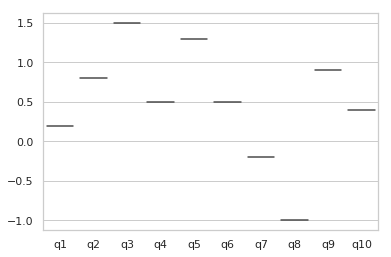

In [25]:
data = {'q'+str(i+1):[] for i in range(len(mus))}
for i in range(len(mus)):
    for _ in range(1000):
        key = 'q'+str(i+1)
        data[key].append(np.random.normal(mus[key], sigmas[key]))
data_pd = pd.DataFrame(data)
sns.violinplot(data=data_pd)

In [0]:
agt_00 = DobakAgent(0.0)
agt_01 = DobakAgent(0.1)
agt_001 = DobakAgent(0.01)

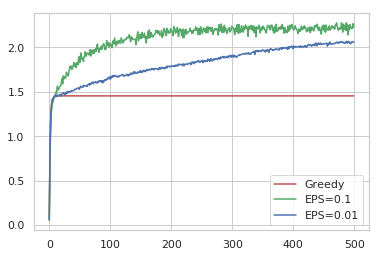

In [27]:
cavg_agt_00, cavg_agt_01, cavg_agt_001 = experiment(agt_00, agt_01, agt_001, sig=0)

plt.plot(cavg_agt_00, color='r', label='Greedy')
plt.plot(cavg_agt_01, color='g', label='EPS=0.1')
plt.plot(cavg_agt_001, color='b', label='EPS=0.01')
plt.legend(loc='best')

## 환경이 중간에 변화하는 경우라면(non-stationary task)?

In [0]:
change_n = 250

def experiment_change(agt_00, agt_01, agt_001, sig=1, steps=500, n_runs=1000):
    res_agt_00 = {}
    res_agt_01 = {}
    res_agt_001 = {}
    for n in range(n_runs):
        # 한 번의 런마다 하나의 문제를 생성한다.
        mus = np.random.uniform(-3, 3, 10)
        mus = {'q'+str(i+1):mus[i] for i in range(len(mus))}
        sigmas = {'q'+str(i+1):sig for i in range(len(mus))}
        res_agt_00[n] = []
        res_agt_01[n] = []
        res_agt_001[n] = []
        # 에이전트들을 리셋 시킨다.
        agt_00.reset()
        agt_01.reset()
        agt_001.reset()
        for step in range(steps):
            # 루프의 턴수가 250이 넘을 때마다 분포의 평균이 서로 바뀌는 상황
            if (i+1)%change_n == 0:
                vals = np.random.permutation(list(mus.values()))
                for idx, k in enumerate(mus):
                    mus[k] = vals[idx]
            # 각 에이전트는 슬롯머신 손잡이를 선택한다.
            action_00 = agt_00.decide()
            action_01 = agt_01.decide()
            action_001 = agt_001.decide()
            # 각 에이전트의 선택에 따른 결과를 받는다.
            reward_00 = np.random.normal(mus[action_00], sigmas[action_00])
            reward_01 = np.random.normal(mus[action_01], sigmas[action_01])
            reward_001 = np.random.normal(mus[action_001], sigmas[action_001])
            res_agt_00[n].append(reward_00)
            res_agt_01[n].append(reward_01)
            res_agt_001[n].append(reward_001)
            # 각 에이전트의 카운터를 올리고, 평균 보상값을 업데이트한다.
            agt_00.N[action_00] += 1
            agt_01.N[action_01] += 1
            agt_001.N[action_001] += 1
            agt_00.Q[action_00] += (1/agt_00.N[action_00]) * (reward_00 - agt_00.Q[action_00])
            agt_01.Q[action_01] += (1/agt_01.N[action_01]) * (reward_01 - agt_01.Q[action_01])
            agt_001.Q[action_001] += (1/agt_001.N[action_001]) * (reward_001 - agt_001.Q[action_001])
    # 각 타입 스탭마다 2000번의 시행결과를 평균낸다.
    res_00, res_01, res_001 = [], [], []
    for step in range(steps):
        temp_00, temp_01, temp_001 = [], [], []
        for n in range(n_runs):
            temp_00.append(res_agt_00[n][step])
            temp_01.append(res_agt_01[n][step])
            temp_001.append(res_agt_001[n][step])
        res_00.append(np.mean(temp_00))
        res_01.append(np.mean(temp_01))
        res_001.append(np.mean(temp_001))
    return res_00, res_01, res_001

In [0]:
agt_00 = DobakAgent(0.0)
agt_01 = DobakAgent(0.1)
agt_001 = DobakAgent(0.01)

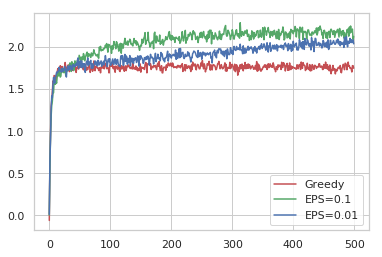

In [30]:
cavg_agt_00, cavg_agt_01, cavg_agt_001 = experiment_change(agt_00, agt_01, agt_001)

plt.plot(cavg_agt_00, color='r', label='Greedy')
plt.plot(cavg_agt_01, color='g', label='EPS=0.1')
plt.plot(cavg_agt_001, color='b', label='EPS=0.01')
plt.legend(loc='best')

## 왜 이런 탐색 방법이 필요한가?

*   어떤 것을 선택하는 것이 좋은지를 먼저 알아야 한다.
*   어떤 선택지가 더 나은 선택지인지를 알기 위해선 검증과정이 필요하다.
*   실제 세계는 항상 변화하기에 지속적인 탐색이 필요하다.

